*Name* : Sanket S Houde

*Roll no* : 18387

# Part 1 

This is for around 300,000 parameters.

In [ ]:
from matplotlib import pyplot as plt

# All of the Keras datasets are in keras.datasets
from tensorflow.keras.datasets import mnist

# Keras has already split the data into training and test data
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
print(len(training_images), training_images[0].shape)


11493376/11490434 [==============================] - 0s 0us/step
60000 (28, 28)


In [ ]:
from tensorflow.keras.utils import to_categorical

# Preparing the dataset
# Setup train and test splits
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


# 28 x 28 = 784, because that's the dimensions of the MNIST data.
image_size = 784

# Reshaping the training_images and test_images to lists of vectors with length 784
# instead of lists of 2D arrays. Same for the test_images
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)
print("training data: ", training_images.shape, " ==> ", training_data.shape)
print("test data: ", test_images.shape, " ==> ", test_data.shape)


training data:  (60000, 28, 28)  ==>  (60000, 784)
test data:  (10000, 28, 28)  ==>  (10000, 784)


In [ ]:
# Create 1-hot encoded vectors using to_categorical
num_classes = 10 # Because it's how many digits we have (0-9) 

# to_categorical takes a list of integers (our labels) and makes them into 1-hot vectors
training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Sequential models are a series of layers applied linearly.
model = Sequential()

# The first layer must specify it's input_shape.
# This is how the first two layers are added, the input layer and the hidden layer.
model.add(Dense(units=380, activation='sigmoid', input_shape=(image_size,)))

# This is how the output layer gets added, the 'softmax' activation function ensures
# that the sum of the values in the output nodes is 1. Softmax is very
# common in classification networks. 
model.add(Dense(units=num_classes, activation='softmax'))



Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 380)               298300    
_________________________________________________________________
dense_39 (Dense)             (None, 10)                3810      
Total params: 302,110
Trainable params: 302,110
Non-trainable params: 0
_________________________________________________________________


[array([[ 0.00640833, -0.06149016,  0.04197108, ..., -0.05606778,
          0.03549939, -0.04035026],
        [-0.05736691, -0.03853961,  0.02589772, ..., -0.05142827,
          0.04321899,  0.00094026],
        [-0.04358263,  0.0435328 , -0.02274442, ..., -0.03451384,
         -0.03026424, -0.05166218],
        ...,
        [ 0.02925818, -0.01170522,  0.06660467, ..., -0.07106418,
          0.0440244 , -0.02363075],
        [ 0.0030968 , -0.04984331,  0.07049448, ..., -0.01232053,
          0.04579558,  0.07034483],
        [ 0.06277632,  0.00526959,  0.06659094, ...,  0.05952751,
         -0.00216599,  0.07112751]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 380)               298300    
_________________________________________________________________
dense_39 (Dense)             (None, 10)                3810      
Total params: 302,110
Trainable params: 302,110
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0789 - accuracy: 0.9829 - val_loss: 0.1198 - val_accuracy: 0.9665
Epoch 2/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0759 - accuracy: 0.9841 - val_loss: 0.1199 - val_accuracy: 0.9667
Epoch 3/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0730 - accuracy: 0.9846 - val_loss: 0.1194 - val_accuracy: 0.9668
Epoch 4/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0710 - 

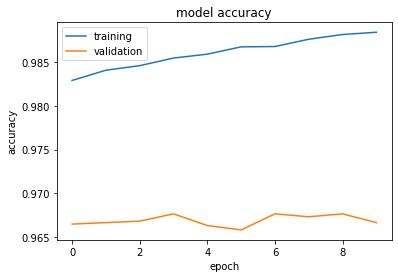

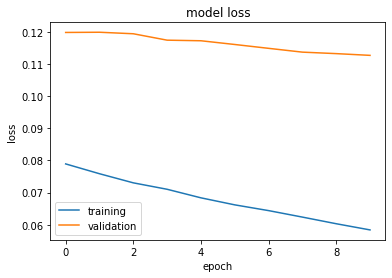

Test loss: 0.138
Test accuracy: 0.959


In [ ]:
# sgd stands for stochastic gradient descent.
# categorical_crossentropy is a common loss function used for categorical classification.
# accuracy is the percent of predictions that were correct.
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

# This function provides useful text data for our network
model.summary()


# The network will make predictions for 128 flattened images per correction.
# It will make a prediction on each item in the training set 10 times (10 epochs)
# And 10% of the data will be used as validation data.
history = model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=True, validation_split=.1)

loss, accuracy  = model.evaluate(test_data, test_labels, verbose=True)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

##This piece of code is for *fewer than 50,000* parameters


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Sequential models are a series of layers applied linearly.
model = Sequential()

# The first layer must specify it's input_shape.
# This is how the first two layers are added, the input layer and the hidden layer.
model.add(Dense(units=62, activation='sigmoid', input_shape=(image_size,)))

# This is how the output layer gets added, the 'softmax' activation function ensures
# that the sum of the values in the output nodes is 1. Softmax is very
# common in classification networks. 
model.add(Dense(units=num_classes, activation='softmax'))

# sgd stands for stochastic gradient descent.
# categorical_crossentropy is a common loss function used for categorical classification.
# accuracy is the percent of predictions that were correct.
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

# This function provides useful text data for our network
model.summary()


Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 62)                48670     
_________________________________________________________________
dense_69 (Dense)             (None, 10)                630       
Total params: 49,300
Trainable params: 49,300
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
422/422 [==============================] - 1s 3ms/step - loss: 1.1858 - accuracy: 0.7001 - val_loss: 0.7040 - val_accuracy: 0.8625
Epoch 2/10
422/422 [==============================] - 1s 3ms/step - loss: 0.6469 - accuracy: 0.8513 - val_loss: 0.4982 - val_accuracy: 0.8963
Epoch 3/10
422/422 [==============================] - 1s 3ms/step - loss: 0.5141 - accuracy: 0.8755 - val_loss: 0.4112 - val_accuracy: 0.9058
Epoch 4/10
422/422 [==============================] - 1s 3ms/step - loss: 0.4475 - accuracy: 0.8888 - val_loss: 0.3694 - val_accuracy: 0.9147
Epoch 5/10
422/422 [==============================] - 1s 3ms/step - loss: 0.4066 - accuracy: 0.8961 - val_loss: 0.3346 - val_accuracy: 0.9177
Epoch 6/10
422/422 [==============================] - 1s 3ms/step - loss: 0.3763 - accuracy: 0.9023 - val_loss: 0.3098 - val_accuracy: 0.9272
Epoch 7/10
422/422 [==============================] - 1s 3ms/step - loss: 0.3540 - accuracy: 0.9066 - val_loss: 0.3055 - val_accuracy: 0.9232
Epoch 

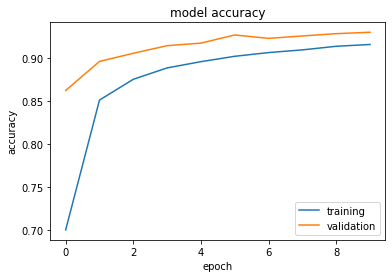

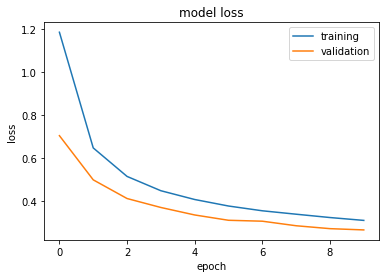

Test loss: 0.301
Test accuracy: 0.919


In [ ]:

# The network will make predictions for 128 flattened images per correction.
# It will make a prediction on each item in the training set 10 times (10 epochs)
# And 10% of the data will be used as validation data.
history = model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=True, validation_split=.1)

loss, accuracy  = model.evaluate(test_data, test_labels, verbose=True)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# Part Two 

**First model** with < 10 nodes in each layer


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Sequential models are a series of layers applied linearly.
model = Sequential()

# The first layer must specify it's input_shape.
# This is how the first two layers are added, the input layer and the hidden layer.
model.add(Dense(units=10, activation='sigmoid', input_shape=(image_size,)))

for i in range(1,9):
  model.add(Dense(units=10, activation='sigmoid'))

# This is how the output layer gets added, the 'softmax' activation function ensures
# that the sum of the values in the output nodes is 1. Softmax is very
# common in classification networks. 
model.add(Dense(units=num_classes, activation='softmax'))

# sgd stands for stochastic gradient descent.
# categorical_crossentropy is a common loss function used for categorical classification.
# accuracy is the percent of predictions that were correct.
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

# This function provides useful text data for our network
model.summary()


Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_71 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_72 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_73 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_74 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_75 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_76 (Dense)             (None, 10)              

Epoch 1/10
422/422 [==============================] - 1s 2ms/step - loss: 2.3347 - accuracy: 0.1036 - val_loss: 2.3064 - val_accuracy: 0.1113
Epoch 2/10
422/422 [==============================] - 1s 2ms/step - loss: 2.3033 - accuracy: 0.1087 - val_loss: 2.3020 - val_accuracy: 0.1050
Epoch 3/10
422/422 [==============================] - 1s 2ms/step - loss: 2.3013 - accuracy: 0.1132 - val_loss: 2.3020 - val_accuracy: 0.1050
Epoch 4/10
422/422 [==============================] - 1s 2ms/step - loss: 2.3012 - accuracy: 0.1132 - val_loss: 2.3019 - val_accuracy: 0.1050
Epoch 5/10
422/422 [==============================] - 1s 2ms/step - loss: 2.3012 - accuracy: 0.1132 - val_loss: 2.3020 - val_accuracy: 0.1050
Epoch 6/10
422/422 [==============================] - 1s 2ms/step - loss: 2.3012 - accuracy: 0.1132 - val_loss: 2.3019 - val_accuracy: 0.1050
Epoch 7/10
422/422 [==============================] - 1s 2ms/step - loss: 2.3012 - accuracy: 0.1132 - val_loss: 2.3020 - val_accuracy: 0.1050
Epoch 

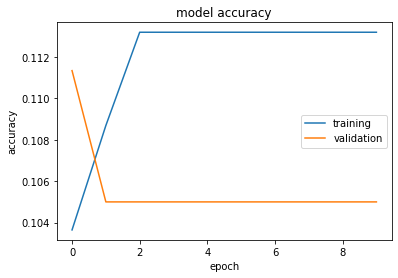

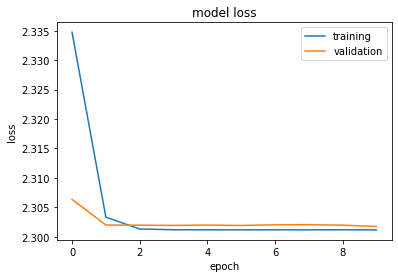

Test loss: 2.3
Test accuracy: 0.113


In [ ]:
# It will make a prediction on each item in the training set 10 times (10 epochs)
# And 10% of the data will be used as validation data.
history = model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=True, validation_split=.1)

loss, accuracy  = model.evaluate(test_data, test_labels, verbose=True)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

**Second model** with 10-50 nodes in each layer

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Sequential models are a series of layers applied linearly.
model = Sequential()

# The first layer must specify it's input_shape.
# This is how the first two layers are added, the input layer and the hidden layer.
model.add(Dense(units=10, activation='sigmoid', input_shape=(image_size,)))

for i in range(1,9):
  model.add(Dense(units=39, activation='sigmoid'))

# This is how the output layer gets added, the 'softmax' activation function ensures
# that the sum of the values in the output nodes is 1. Softmax is very
# common in classification networks. 
model.add(Dense(units=num_classes, activation='softmax'))

# sgd stands for stochastic gradient descent.
# categorical_crossentropy is a common loss function used for categorical classification.
# accuracy is the percent of predictions that were correct.
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

# This function provides useful text data for our network
model.summary()


Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_91 (Dense)             (None, 39)                429       
_________________________________________________________________
dense_92 (Dense)             (None, 39)                1560      
_________________________________________________________________
dense_93 (Dense)             (None, 39)                1560      
_________________________________________________________________
dense_94 (Dense)             (None, 39)                1560      
_________________________________________________________________
dense_95 (Dense)             (None, 39)                1560      
_________________________________________________________________
dense_96 (Dense)             (None, 39)              

Epoch 1/10
422/422 [==============================] - 1s 3ms/step - loss: 2.3205 - accuracy: 0.1123 - val_loss: 2.3026 - val_accuracy: 0.1050
Epoch 2/10
422/422 [==============================] - 1s 2ms/step - loss: 2.3013 - accuracy: 0.1132 - val_loss: 2.3020 - val_accuracy: 0.1050
Epoch 3/10
422/422 [==============================] - 1s 2ms/step - loss: 2.3014 - accuracy: 0.1132 - val_loss: 2.3017 - val_accuracy: 0.1050
Epoch 4/10
422/422 [==============================] - 1s 2ms/step - loss: 2.3013 - accuracy: 0.1132 - val_loss: 2.3021 - val_accuracy: 0.1050
Epoch 5/10
422/422 [==============================] - 1s 3ms/step - loss: 2.3013 - accuracy: 0.1132 - val_loss: 2.3021 - val_accuracy: 0.1050
Epoch 6/10
422/422 [==============================] - 1s 3ms/step - loss: 2.3013 - accuracy: 0.1132 - val_loss: 2.3021 - val_accuracy: 0.1050
Epoch 7/10
422/422 [==============================] - 1s 3ms/step - loss: 2.3012 - accuracy: 0.1132 - val_loss: 2.3020 - val_accuracy: 0.1050
Epoch 

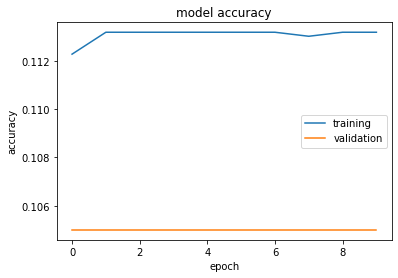

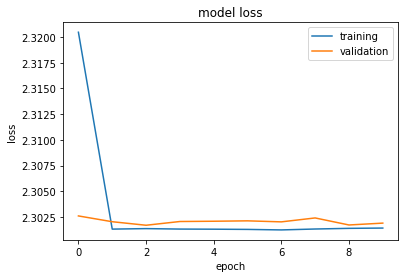

Test loss: 2.3
Test accuracy: 0.113


In [ ]:
# It will make a prediction on each item in the training set 10 times (10 epochs)
# And 10% of the data will be used as validation data.
history = model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=True, validation_split=.1)

loss, accuracy  = model.evaluate(test_data, test_labels, verbose=True)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

**Third model** with 50-100 nodes in each layer

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Sequential models are a series of layers applied linearly.
model = Sequential()

# The first layer must specify it's input_shape.
# This is how the first two layers are added, the input layer and the hidden layer.
model.add(Dense(units=10, activation='sigmoid', input_shape=(image_size,)))

for i in range(1,9):
  model.add(Dense(units=79, activation='sigmoid'))

# This is how the output layer gets added, the 'softmax' activation function ensures
# that the sum of the values in the output nodes is 1. Softmax is very
# common in classification networks. 
model.add(Dense(units=num_classes, activation='softmax'))

# sgd stands for stochastic gradient descent.
# categorical_crossentropy is a common loss function used for categorical classification.
# accuracy is the percent of predictions that were correct.
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

# This function provides useful text data for our network
model.summary()


Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 10)                7850      
_________________________________________________________________
dense_101 (Dense)            (None, 79)                869       
_________________________________________________________________
dense_102 (Dense)            (None, 79)                6320      
_________________________________________________________________
dense_103 (Dense)            (None, 79)                6320      
_________________________________________________________________
dense_104 (Dense)            (None, 79)                6320      
_________________________________________________________________
dense_105 (Dense)            (None, 79)                6320      
_________________________________________________________________
dense_106 (Dense)            (None, 79)              

Epoch 1/10
422/422 [==============================] - 2s 4ms/step - loss: 2.3175 - accuracy: 0.1090 - val_loss: 2.3019 - val_accuracy: 0.1050
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 2.3016 - accuracy: 0.1130 - val_loss: 2.3025 - val_accuracy: 0.1050
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 2.3016 - accuracy: 0.1130 - val_loss: 2.3021 - val_accuracy: 0.1050
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 2.3015 - accuracy: 0.1130 - val_loss: 2.3026 - val_accuracy: 0.1050
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 2.3016 - accuracy: 0.1132 - val_loss: 2.3034 - val_accuracy: 0.1050
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 2.3017 - accuracy: 0.1132 - val_loss: 2.3025 - val_accuracy: 0.1050
Epoch 7/10
422/422 [==============================] - 1s 3ms/step - loss: 2.3016 - accuracy: 0.1132 - val_loss: 2.3020 - val_accuracy: 0.1050
Epoch 

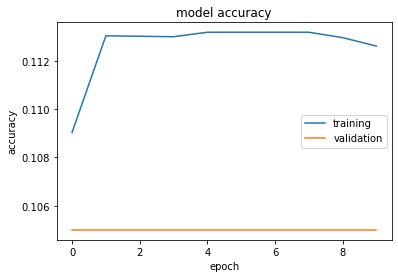

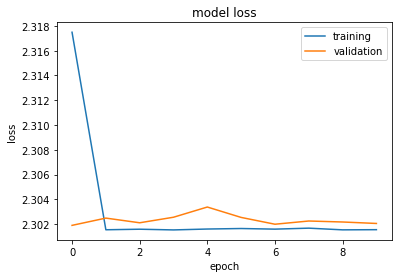

Test loss: 2.3
Test accuracy: 0.113


In [ ]:
# It will make a prediction on each item in the training set 10 times (10 epochs)
# And 10% of the data will be used as validation data.
history = model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=True, validation_split=.1)

loss, accuracy  = model.evaluate(test_data, test_labels, verbose=True)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# Part Three 

A model with 3 hidden layers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Sequential models are a series of layers applied linearly.
model = Sequential()

image_size=784
num_classes=10

# The first layer must specify it's input_shape.
# This is how the first two layers are added, the input layer and the hidden layer.
model.add(Dense(units=10, activation='sigmoid', input_shape=(image_size,)))

for i in range(1,3):
  model.add(Dense(units=380, activation='sigmoid'))

# This is how the output layer gets added, the 'softmax' activation function ensures
# that the sum of the values in the output nodes is 1. Softmax is very
# common in classification networks. 
model.add(Dense(units=num_classes, activation='softmax'))

# sgd stands for stochastic gradient descent.
# categorical_crossentropy is a common loss function used for categorical classification.
# accuracy is the percent of predictions that were correct.
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

# This function provides useful text data for our network
model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_34 (Dense)             (None, 380)               4180      
_________________________________________________________________
dense_35 (Dense)             (None, 380)               144780    
_________________________________________________________________
dense_36 (Dense)             (None, 10)                3810      
Total params: 160,620
Trainable params: 160,620
Non-trainable params: 0
_________________________________________________________________


Epoch 1/390
422/422 [==============================] - 3s 6ms/step - loss: 2.3024 - accuracy: 0.1177 - val_loss: 2.2979 - val_accuracy: 0.1497
Epoch 2/390
422/422 [==============================] - 2s 6ms/step - loss: 2.2938 - accuracy: 0.1252 - val_loss: 2.2907 - val_accuracy: 0.1050
Epoch 3/390
422/422 [==============================] - 2s 6ms/step - loss: 2.2855 - accuracy: 0.1482 - val_loss: 2.2800 - val_accuracy: 0.1145
Epoch 4/390
422/422 [==============================] - 2s 6ms/step - loss: 2.2745 - accuracy: 0.1716 - val_loss: 2.2667 - val_accuracy: 0.2185
Epoch 5/390
422/422 [==============================] - 2s 6ms/step - loss: 2.2603 - accuracy: 0.2120 - val_loss: 2.2537 - val_accuracy: 0.1050
Epoch 6/390
422/422 [==============================] - 2s 6ms/step - loss: 2.2424 - accuracy: 0.2451 - val_loss: 2.2300 - val_accuracy: 0.2315
Epoch 7/390
422/422 [==============================] - 2s 6ms/step - loss: 2.2195 - accuracy: 0.2899 - val_loss: 2.2039 - val_accuracy: 0.3710

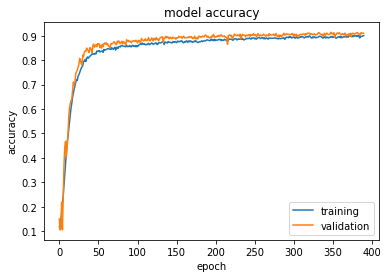

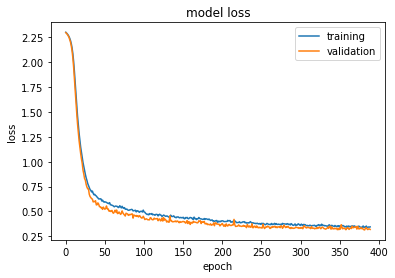

Test loss: 0.371
Test accuracy: 0.896


In [ ]:

# And 10% of the data will be used as validation data.
history = model.fit(training_data, training_labels, batch_size=128, epochs=390, verbose=True, validation_split=.1)

loss, accuracy  = model.evaluate(test_data, test_labels, verbose=True)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')